In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

# 1 Kalman Filter

In [3]:
def Normal(mu, Sigma):
    return np.random.multivariate_normal(mu, Sigma)

In [5]:
# The setup is adapted from Adapted from Murphy who in turn follows Koller&Friedman
np.random.seed(7)

A = np.array([[1, 0, 1, 0],[0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]])
C = np.array([[1, 0, 0, 0],[0, 1, 0, 0]])

G = 0.001 * np.eye(4)
S = 1*np.eye(2)

mu0 = np.array([8, 10, 1, 0])
P0 = np.eye(4)

T = 15
Z = np.zeros((T, 4))
X = np.zeros((T, 2))
for t in range(T):
    if t == 0:
        Z[t] = Normal(mu0, P0)
    else:
        Z[t] = Normal(A.dot(Z[t-1]), G)
    X[t] = Normal(C.dot(Z[t]), S)
    
np.save("kalman.npy", X)

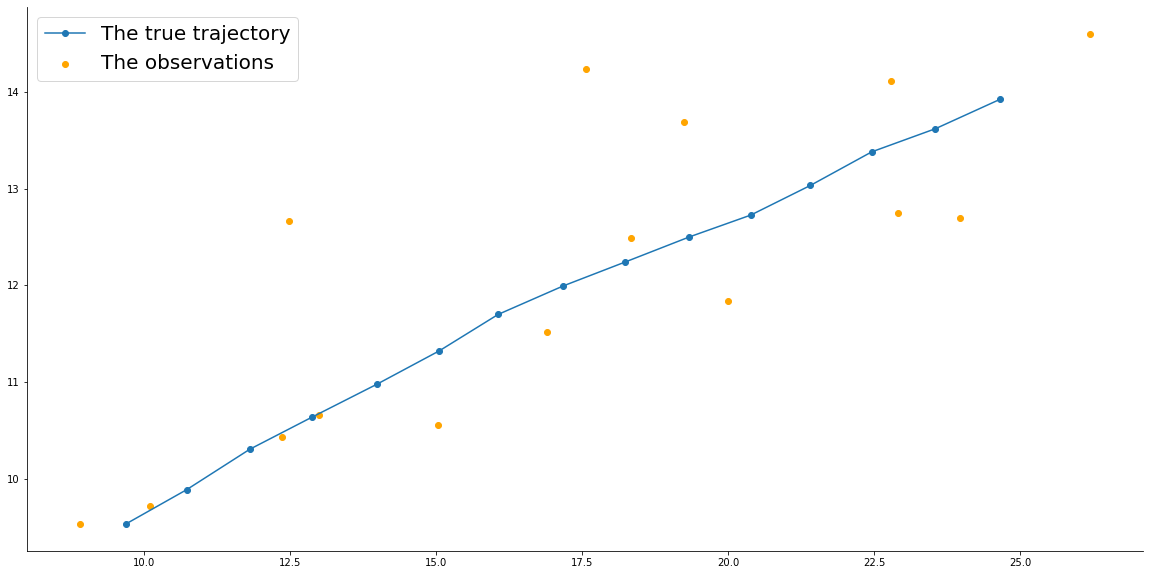

In [6]:
plt.plot(Z[:,0], Z[:,1], '-o', label="The true trajectory")
plt.scatter(X[:,0], X[:,1], color="orange", label = "The observations")
plt.legend(fontsize=20)
sns.despine()

In [7]:
# Here we use A @ B as the matrix product 

Mu = np.zeros((T,4))
# Initial step
K = P0 @ C.T @ np.linalg.inv(C @ P0 @ C.T + S) # vs. P0.dot(C.T).dot(np.linalg.inv(C.dot(P0).dot(C.T) + S))
Mu[0] = mu0 + K @ (X[0] - C @ mu0)
V = (np.eye(4) - K @ C) @ P0
# The other T-1 steps
for t in range(1,T):
    P = A @ V @ A.T + G
    K = P @ C.T @ np.linalg.inv(C @ P @ C.T + S)
    Mu[t] = A @ Mu[t-1] + K @ (X[t] - C @ A @ Mu[t-1])
    V = (np.eye(4) - K @ C) @ P

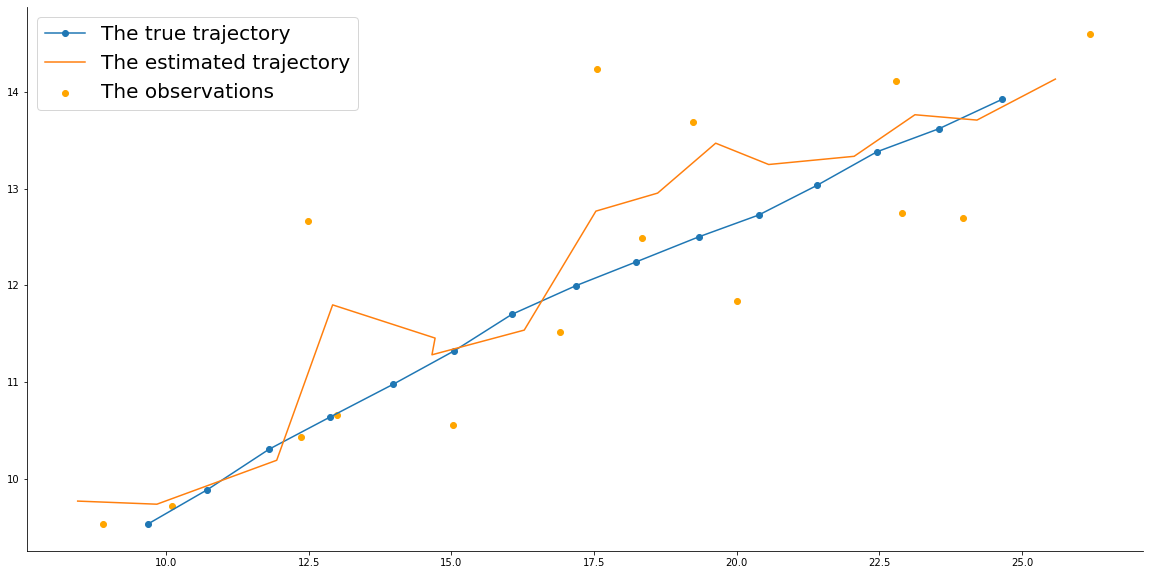

In [8]:
plt.plot(Z[:,0], Z[:,1], '-o', label="The true trajectory")
plt.scatter(X[:,0], X[:,1], color="orange", label = "The observations")
plt.plot(Mu[:,0], Mu[:,1], label="The estimated trajectory")
plt.legend(fontsize=20)
sns.despine()